In [1]:
import numpy as np
from matplotlib import pyplot as plt

from dftpy.ions import Ions
from dftpy.functional import Functional
from dftpy.formats import io

from ase.io import read
from ase.lattice.spacegroup import Spacegroup
from ase.lattice.spacegroup import crystal

from scipy.optimize import minimize

from dftpy.ions import Ions
from dftpy.functional import Functional
from dftpy.formats import io
from dftpy.ions import Ions
from dftpy.field import DirectField
from dftpy.grid import DirectGrid
from dftpy.functional import LocalPseudo, Functional, TotalFunctional, ExternalPotential
from dftpy.formats import io
from dftpy.math_utils import ecut2nr
from dftpy.optimization import Optimization

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/ase/lattice/spacegroup.py:5: UserWarning: Moved to ase.spacegroup
  warnings.warn('Moved to ase.spacegroup')


In [2]:
path_pp='/Users/valeria/Documents/PP/ofpp/EAC/upf/blps/'
file='si.lda.upf'
PP_list = {'Si': path_pp+file}

In [3]:
KS_TE = []
for i in np.arange(0,30,1):
    with open('/Users/Valeria/Documents/aiWT/Model_ML_function/test_set_data/ks_calculations_test_set/DATA_dhcp/Si_dhcp'+str(i)+'.out') as D:
        k = [match for match in D if "!    total energy" in match]
    KS_te = str(k).split()[4]
    KS_TE.append(float(KS_te)) 
ks_te = np.asarray(KS_TE)

In [4]:
def min_energy(x0, *args):
        KS_TE, rho, ions = args
        KE = Functional(type='KEDF',name='WT', rho0=x0)
        grid = DirectGrid(lattice=ions.cell, nr=[len(rho),len(rho),len(rho[0,0])])
        PSEUDO = LocalPseudo(grid = grid, ions=ions, PP_list=PP_list, rcut=10)
        rho_ini = DirectField(grid=grid)
        rho_ini[:] = ions.get_ncharges()/ions.cell.volume
        
        evaluator = TotalFunctional(KE=KE, XC=XC, HARTREE=HARTREE, PSEUDO=PSEUDO)
        # optimization_options = {'econv' : 1e-5*ions.nat}
        # opt = Optimization(EnergyEvaluator=evaluator, optimization_options = optimization_options, 
        #                    optimization_method = 'TN')
        # rho = opt.optimize_rho(guess_rho=rho_ini)
        OF_TE = evaluator.Energy(rho=rho, ions=ions)
        # OF_KE = KE(rho).energy
        diff = np.abs(KS_TE*1/2-OF_TE)
        print(diff)
        return diff

In [ ]:
XC = Functional(type='XC',name='LDA')
HARTREE = Functional(type='HARTREE')
l = np.linspace(0.8, 1.4, 30)
delta_E = []
R0 = []
vol = []
for n in np.arange(0,30,1):
    print('NEW STRUTURE')
    i = int(n)
    rho = io.read_density('/Users/Valeria/Documents/aiWT/Model_ML_function/test_set_data/ks_calculations_test_set/DATA_dhcp/rho0_dhcp_'+str(i)+'.xsf')
    inputfile = 'Si_dhcp.vasp'
    ions = Ions.from_ase(read(inputfile, format='vasp'))    
    cell = ions.get_cell()
    ions.set_cell(cell * l[i], scale_atoms=True) 
    KS_TE = ks_te[i]
    minn = minimize(min_energy, 0.2, args = (KS_TE, rho, ions), method='Powell', bounds=[[0,0.1]], options={'ftol' : 1e-5})
    VOLUME = ions.get_volume()
    vol.append(VOLUME)
    delta_E.append(minn.fun)
    R0.append(minn.x)

NEW STRUTURE
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
0.5837694360895096
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
0.7862115033207271
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
0.8933993691222692
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
0.642735267289595
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
0.458862012340278
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
0.24477515471092737
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
0.09459287510524561
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
0.023997559502085153
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
0.11830968820289911
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
0.052811513416530786
setting key: Si -> /Users/valeri

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dftpy/functional/kedf/kernel.py:334: RuntimeWarning: divide by zero encountered in divide
  return LindhardFunction(q / tkf, x, y) * factor
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dftpy/functional/kedf/kernel.py:334: RuntimeWarning: invalid value encountered in divide
  return LindhardFunction(q / tkf, x, y) * factor
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dftpy/functional/kedf/kernel.py:54: RuntimeWarning: invalid value encountered in divide
  + 0.25 * (1.0 - eta ** 2) * np.log((1.0 + eta) / np.abs(1.0 - eta)) / eta
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dftpy/functional/kedf/kernel.py:75: RuntimeWarning: invalid value encountered in multiply
  3.0 * (1.0 - mu) * eta ** 2


0.7862115033207271
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
0.8933993691222692
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
0.642735267289595
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
0.458862012340278
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
0.24477515471092737
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
0.09459287510524561
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
0.023997559502085153
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
0.11830968820289911
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
0.052811513416530786
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
0.016569988379819378
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
0.010483232402503262
setting key: Si -> /Us

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dftpy/functional/kedf/kernel.py:329: RuntimeWarning: invalid value encountered in power
  tkf = 2.0 * (3.0 * rho0 * np.pi ** 2) ** (1.0 / 3.0)


0.8253824929399549
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
0.9294697763997259
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
0.68586756555721
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
0.5066048631812432
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
0.29423473677706546
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
0.12182187997231964
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
0.03427936520400365
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
0.12327543950067366
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
0.05933037083552861
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
0.009918049258264006
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
0.04597100355987571
setting key: Si -> /Users

Text(0, 0.5, '$ρ_{0}$')

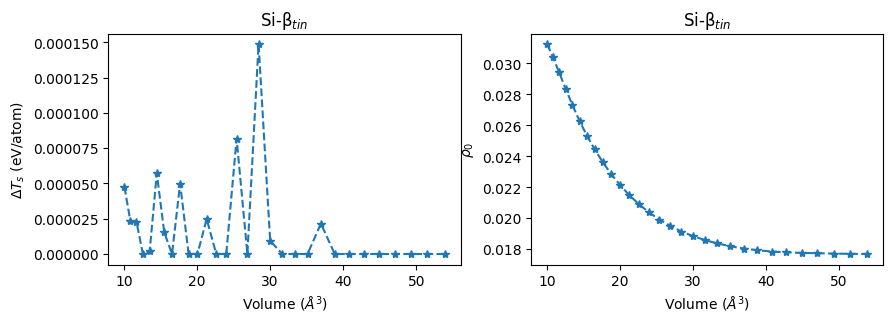

In [15]:
fig, axs = plt.subplots(1,2, figsize=(10,3))
im0 = axs[0].plot(np.asarray(vol)*0.529177**3/4,np.asarray(delta_E)*1/4,'*--')
im1 = axs[1].plot(np.asarray(vol)*0.529177**3/4,np.asarray(R0),'*--')
axs[0].set_title('Si-\u03B2$_{tin}$')
axs[1].set_title('Si-\u03B2$_{tin}$')
axs[0].set_xlabel('Volume ($\AA^{3}$)')
axs[0].set_ylabel('$\Delta T_{s}$ (eV/atom)')
axs[1].set_xlabel('Volume ($\AA^{3}$)')
axs[1].set_ylabel('$\u03C1_{0}$')

In [14]:
np.save('/Users/Valeria/Documents/aiWT/Model_ML_function/training_set_data/ks_calculations/Si_dhcp/DATA2/rho0_TE', np.asarray(R0))

In [9]:
R0

[array([0.0312478]),
 array([0.03039043]),
 array([0.02941385]),
 array([0.02835748]),
 array([0.02730989]),
 array([0.02628109]),
 array([0.02533811]),
 array([0.02443978]),
 array([0.02361487]),
 array([0.02283413]),
 array([0.02212848]),
 array([0.02148411]),
 array([0.0208971]),
 array([0.02037796]),
 array([0.01990757]),
 array([0.01951211]),
 array([0.01913716]),
 array([0.01884785]),
 array([0.01858508]),
 array([0.01836704]),
 array([0.01818811]),
 array([0.01804171]),
 array([0.01793113]),
 array([0.01784647]),
 array([0.01779288]),
 array([0.01775824]),
 array([0.01773428]),
 array([0.0177141]),
 array([0.0176996]),
 array([0.01768577])]

In [12]:
len(R0)

30